# Graphing box/dist plots
The code below demonstrates generating combined boxplot and distplot using Seaborn. We mainly look at how three variables affect users generating individual fields within the account creation process.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from matplotlib import pyplot
import matplotlib.pyplot as plt

# set color
sns.set_color_codes('pastel')

In [2]:
# read in data 
not_complete = pd.read_csv('data_notcomplete.csv')  # , usecols=['culture', 'scenario', 'interface', 'percent']

# copy df specific to culture, scenario, and interface
kor = not_complete.query("culture == 'Korea'").copy()
usa = not_complete.query("culture == 'USA'").copy()
bank = not_complete.query("scenario == 'Bank'").copy()
shop = not_complete.query("scenario == 'Shop'").copy()
uia = not_complete.query("interface == 'A'").copy()
uib = not_complete.query("interface == 'B'").copy()

In [3]:
bank.columns

Index(['culture', 'scenario', 'interface', 'total_available',
       'Average Point Value Without 0s', 'Avg Without 0s/Total',
       'Average Point Value With 0s', 'Avg With 0s/Total', 'Median Without 0s',
       'Median With 0s', 'Min Point Value Without 0s',
       'Min Point Value With 0s', 'possible_max', 'total_n', 'total',
       'percent_notcomplete', 'percent', 'first', 'last', 'phone', 'dob',
       'sex', 'race', 'email', 'zipc', 'ssn', 'address', 'citizenship',
       'website', 'password', 'username', 'relationship'],
      dtype='object')

## Setting variables

In [4]:
# variables
# possible lists of variables are: 
# 'first', 'last', 'phone', 'dob', 'sex', 'race', 'email', 'zip', 'ssn', 'address', 
# 'citizenship', 'website', 'password', 'username', 'relationship'

fieldname = 'phone number'
scenario_name = 'banking'
# scenario_name = 'shopping'

usa_var = bank.loc[bank['culture'] == "USA"].phone
kor_var = bank.loc[bank['culture'] == "Korea"].phone
# usa_var = shop.loc[shop['culture'] == "USA"].phone
# kor_var = shop.loc[shop['culture'] == "Korea"].phone

## Plotting the box-dist Plot

/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

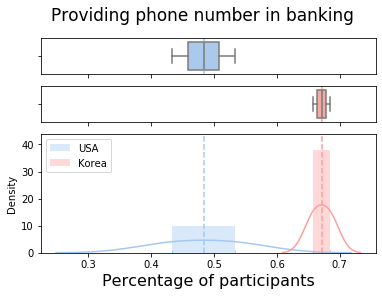

In [5]:
# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, 
                                              gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

sns.boxplot(usa_var, ax=ax_box1, color='b')
sns.boxplot(kor_var, ax=ax_box2, color='r')
ax_box1.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_box2.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('Providing ' + fieldname + ' in ' + scenario_name, fontsize = 17)

sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b', norm_hist=True, bins=2)
sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r', norm_hist=True, bins=2)

# sns.displot(usa_var, ax=ax_dist, label='USA', color='b')  # kde=True, rug=True, , norm_hist=True
# sns.displot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')
ax_dist.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_dist.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.legend()
plt.xlabel('Percentage of participants', fontsize=16)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

# uncomment below to save to local directory
plt.savefig('/Users/Jin/Documents/hcde/21wi/516/code/final/graphs/new_' + fieldname + '_' + scenario_name + '.png')

In [6]:
# calculate mean and STD 
print(np.mean(usa_var))
print(np.mean(kor_var))
print(np.std(usa_var))
print(np.std(kor_var))

0.483333333
0.6710526315
0.04999999999999999
0.01315789449999999


## Another Example

In [7]:
# variables
fieldname = 'Email'
scenario_name = 'Interface A'
# scenario_name = 'Interface B'

usa_var = uia.loc[uia['culture'] == "USA"].email
kor_var = uia.loc[uia['culture'] == "Korea"].email
# usa_var = uib.loc[uib['culture'] == "USA"].email
# kor_var = uib.loc[uib['culture'] == "Korea"].email

/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

[Text(0.5, 0, '')]

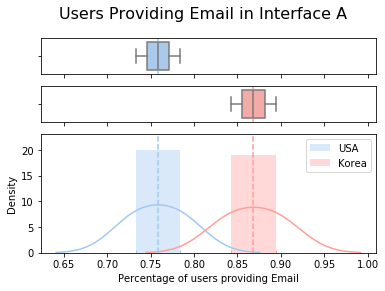

In [8]:
# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, 
                                              gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

sns.boxplot(usa_var, ax=ax_box1, color='b')
sns.boxplot(kor_var, ax=ax_box2, color='r')
ax_box1.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_box2.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('Users Providing ' + fieldname + ' in ' + scenario_name, fontsize = 16)

# sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b')#, norm_hist=True, bins=2)
# sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')#, norm_hist=True, bins=2)

sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b', norm_hist=True, bins=2)
sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r', norm_hist=True, bins=2)

# sns.displot(usa_var, ax=ax_dist, label='USA', color='b')  # kde=True, rug=True, , norm_hist=True
# sns.displot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')
ax_dist.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_dist.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.legend()
plt.xlabel('Percentage of users providing ' + fieldname)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

# plt.savefig('/Users/Jin/Documents/hcde/21wi/516/code/final/graphs/' + fieldname + '_' + scenario_name + '.png')




## Using the other data frame 'data.csv'
Here we plot against total percentage of information provided by the users

In [9]:
# read in dataframe and query out
df = pd.read_csv('data.csv')
bank = df.query("scenario == 'Bank'").copy()
shop = df.query("scenario == 'Shop'").copy()

In [10]:
# variables
scenario_name = 'Total Info'
# scenario_name = 'Interface B'

bank_var = df.loc[df['scenario'] == "Bank"].percent
shop_var = df.loc[df['scenario'] == "Shop"].percent

/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

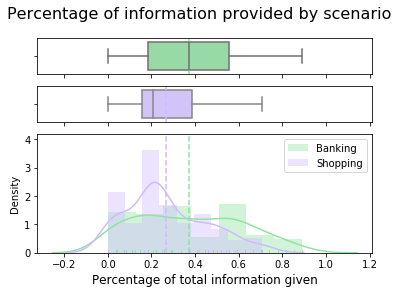

In [11]:
# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, 
                                              gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

sns.boxplot(bank_var, ax=ax_box1, color='g')
sns.boxplot(shop_var, ax=ax_box2, color='m')
ax_box1.axvline(np.mean(bank_var), color='g', linestyle='--')
ax_box2.axvline(np.mean(shop_var), color='m', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('Percentage of information provided by scenario', fontsize = 16)

# sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b')#, norm_hist=True, bins=2)
# sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')#, norm_hist=True, bins=2)

sns.distplot(bank_var, ax=ax_dist, label='Banking', kde=True, rug=True, color='g', norm_hist=True)
sns.distplot(shop_var, ax=ax_dist, label='Shopping', kde=True, rug=True, color='m', norm_hist=True)

# sns.displot(usa_var, ax=ax_dist, label='USA', color='b')  # kde=True, rug=True, , norm_hist=True
# sns.displot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')
ax_dist.axvline(np.mean(bank_var), color='g', linestyle='--')
ax_dist.axvline(np.mean(shop_var), color='m', linestyle='--')
plt.legend()
plt.xlabel('Percentage of total information given', fontsize=12)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

# uncomment below to save to local directory
plt.savefig('/Users/Jin/Documents/hcde/21wi/516/code/final/graphs/total_info_by_scenario.png')

In [12]:
# calculate mean and STD 
print(np.mean(bank_var))
print(np.mean(shop_var))
print(np.std(bank_var))
print(np.std(shop_var))

0.3732048375102041
0.26870748294387753
0.24173948380531704
0.1822169986602615


/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda3/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, F

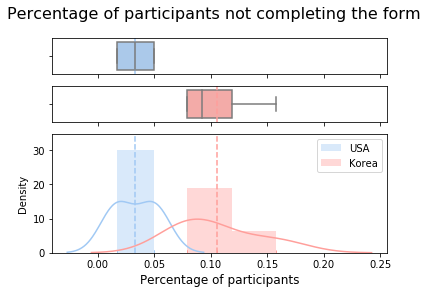

In [13]:
# variables
fieldname = 'not_complete'
scenario_name = 'Interface A'
# scenario_name = 'Interface B'

usa_var = usa.percent_notcomplete
kor_var = kor.percent_notcomplete

# let's plot box-dist plot combined
f, (ax_box1, ax_box2, ax_dist) = plt.subplots(3, sharex=True, 
                                              gridspec_kw= {"height_ratios": (0.3, 0.3, 1)})

sns.boxplot(usa_var, ax=ax_box1, color='b')
sns.boxplot(kor_var, ax=ax_box2, color='r')
ax_box1.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_box2.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.subplots_adjust(top=0.87)
plt.suptitle('Percentage of participants not completing the form', fontsize = 16)

# sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b')#, norm_hist=True, bins=2)
# sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')#, norm_hist=True, bins=2)

sns.distplot(usa_var, ax=ax_dist, label='USA', kde=True, rug=True, color='b', norm_hist=True, bins=2)
sns.distplot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r', norm_hist=True, bins=2)

# sns.displot(usa_var, ax=ax_dist, label='USA', color='b')  # kde=True, rug=True, , norm_hist=True
# sns.displot(kor_var, ax=ax_dist, label='Korea', kde=True, rug=True, color='r')
ax_dist.axvline(np.mean(usa_var), color='b', linestyle='--')
ax_dist.axvline(np.mean(kor_var), color='r', linestyle='--')
plt.legend()
plt.xlabel('Percentage of participants', fontsize=12)
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.savefig('/Users/Jin/Documents/hcde/21wi/516/code/final/graphs/percentage_notcomplete.png')


In [14]:
# calculate mean and STD 
print(np.mean(usa_var))
print(np.mean(kor_var))
print(np.std(usa_var))
print(np.std(kor_var))

0.033333333500000006
0.10526315775
0.016666666500000003
0.03223012843086976
